In [ ]:
import tensorflow as tf 
import numpy as np
import csv 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn import decomposition
from sklearn import datasets

In [ ]:
mnist = tf.keras.datasets.mnist
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()
(ftrain_images, ftrain_labels), (ftest_images,ftest_labels) = fashion_mnist.load_data()
largo, largo_imagen, alto_imagen = train_images.shape

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
text_train_labels = []
labels = ['cero', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis', 'siete', 'ocho', 'nueve']
for i in np.arange(np.size(text_train_labels)):
  text_train_labels.append(train_labels[text_train_labels[i]])

In [ ]:
text_test_labels = []
labels = ['cero', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis', 'siete', 'ocho', 'nueve']
for i in np.arange(np.size(text_train_labels)):
  text_train_labels.append(labels[text_train_labels[i]])

In [ ]:
def flatten_images(data):
  large_data, ancho, largo = np.shape(data)
  imagenes = np.zeros((large_data, ancho*largo))
  for x in np.arange(large_data):
    imagenes[x] = data[x].reshape(1,largo*ancho)
  return imagenes

In [ ]:
images = flatten_images(train_images)
ancho = np.shape(images)[1]
pca = decomposition.PCA(n_components=ancho)
pca.fit(images)
ave = pca.components_
energias = pca.explained_variance_ratio_

Text(0.5, 1.0, 'Dimension vs ECM')

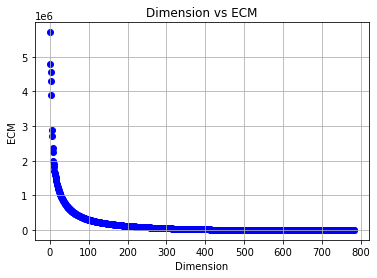

In [ ]:
for dim in np.arange(ancho):
  U = images @ ave[:dim,:].T
  Xh = U @ ave[:dim,:]
  ECM = np.sum((images-Xh)**2)/largo
  plt.scatter(dim, ECM, color ='blue')
plt.grid()
plt.xlabel('Dimension')
plt.ylabel('ECM')
plt.title('Dimension vs ECM')


Text(0.5, 1.0, 'Energia vs ECM')

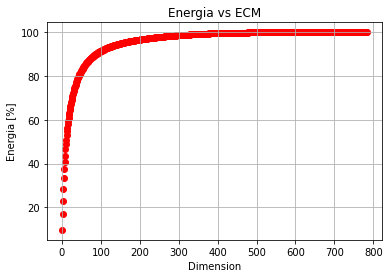

In [ ]:
for y in np.arange(1,ancho):
  energia_parcial = energias[:y]
  plt.scatter(y, np.sum(energia_parcial)*100, color ='red')
plt.grid()
plt.xlabel('Dimension')
plt.ylabel('Energia [%]')
plt.title('Energia vs ECM') 


In [ ]:
#Auto vectores del PCA
ave

array([[ 5.26572512e-20, -4.16333634e-17,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.81692231e-19, -2.77555756e-17,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.63850308e-20, -1.56125113e-17,  4.85722573e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 0.00000000e+00,  1.18520013e-02, -1.61514626e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.39622426e-01, -7.65782175e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00,  1.40949354e-01,  1.34927876e-01, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [ ]:
#reconstruyo imagenes en funcion de los datos de testeo
#la dimension fue elegida en base al ECM vs Dimension
images2 = flatten_images(test_images)
dim = 200
U = images2 @ ave[:dim,:].T
imagenes_reconstruidas = U @ ave[:dim,:]
imagenes_reconstruidas = imagenes_reconstruidas.reshape(10000, largo_imagen, alto_imagen)

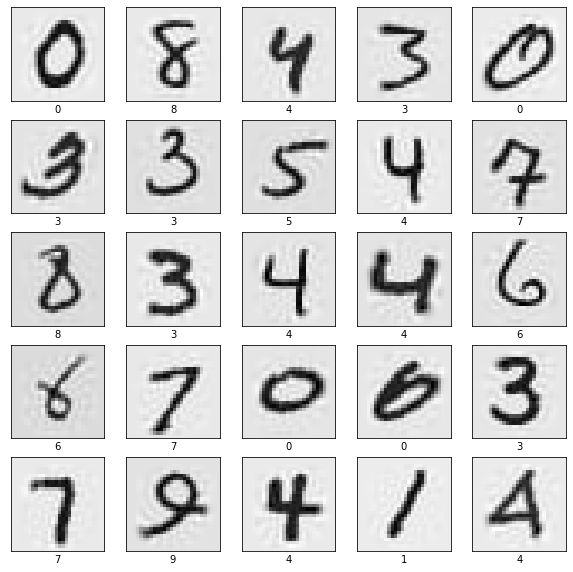

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, imagenes_reconstruidas.shape[0])
  plt.imshow(imagenes_reconstruidas[img_index], cmap="gray_r")
  plt.xlabel(test_labels[img_index])

In [ ]:
#manifold learning
pca2 = decomposition.PCA(n_components=2)
pca2.fit(images)
U2 = pca2.transform(images)
ave2 = pca2.components_

In [ ]:
max1 = np.max(U2[:,0])
min1 = np.min(U2[:,0])
max2 = np.max(U2[:,1])
min2 = np.min(U2[:,1])
print(max1, max2, min1, min2)

2363.3238302974655 1465.9471014970873 -1081.6606289975712 -1382.3452425306443


In [ ]:
x_ml = np.linspace(min1, max1, 10)
y_ml =  np.linspace(min2, max2, 10)

lienzo = np.zeros((10,10,2))
for y in np.arange(10):
  for x in np.arange(10):
    lienzo[x][y] = (x_ml[x],y_ml[y])
lienzo = lienzo.reshape(100,2)

In [ ]:
#reconstruyo los 100 tipos de imagenes
Xh_ml = lienzo @ ave2
Xh_ml = Xh_ml.reshape(100, largo_imagen, alto_imagen)

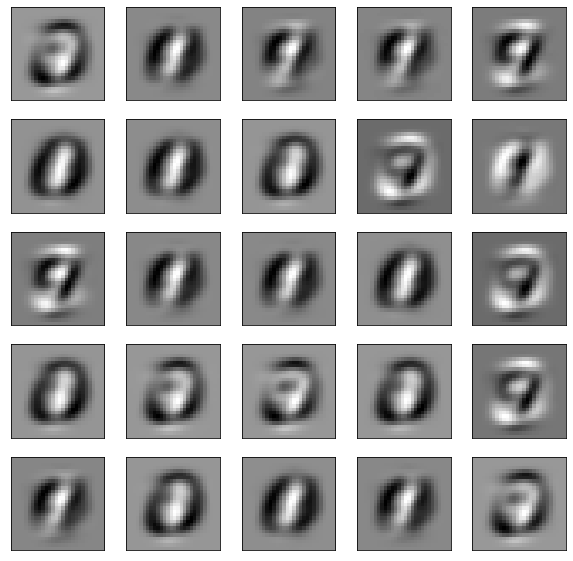

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, Xh_ml.shape[0])
  plt.imshow(Xh_ml[img_index], cmap="gray_r")

In [ ]:
def plot_roc_curve(ce_vector):
  cant_puntos = 1000
  umbral = np.linspace(np.min(ce_vector), np.max(ce_vector),cant_puntos)
  x = np.linspace(0,1,cant_puntos)
  tp = np.zeros(cant_puntos)
  fn = np.zeros(cant_puntos)
  tn = np.zeros(cant_puntos)
  fp = np.zeros(cant_puntos)

  for (idx,t) in enumerate(umbral):
    tp[idx] = np.sum(ce_vector[:10000]<t)
    fn[idx] = np.sum(ce_vector[:10000]>t)
    tn[idx] = np.sum(ce_vector[10000:]>t)
    fp[idx] = np.sum(ce_vector[10000:]<t)

  tpr = tp/(tp+fn)
  fpr = fp/(fp+tn)
  #recta = 1-x
  #ce_vector2 = (recta-tpr)**2
  #a = np.argmin(ce_vector2[1:int(np.shape(ce_vector2)[0])])
  plt.title("ROC Curve")
  plt.xlabel("False positive Rate")
  plt.ylabel("True positive Rate")
  plt.xlim(-0.1,1.1)
  plt.ylim(-0.1,1.1)
  plt.plot(fpr, tpr, label= 'Roc Curve')
  plt.plot(x,1-x , ls ='-.', color = 'black', label = 'EER Line')
  #plt.plot(fpr[a],tpr[a],'.' ,label = "EER")
  plt.grid()
  plt.legend()

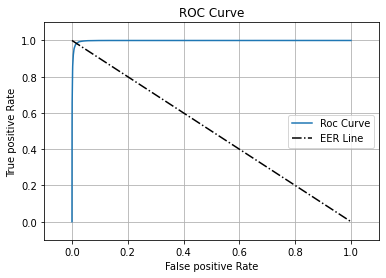

In [ ]:
#deteccion de anomalias
#utilizo los auto vectores del punto 2

#curva roc para dimension 200

fmnist_images = flatten_images(ftest_images)
mnist_images = flatten_images(test_images)

new_dataset = np.vstack((mnist_images, fmnist_images))

U_nd = new_dataset @ ave[:200,:].T
Xh_nd = U_nd @ ave[:200,:]

ce_vector = np.array([])
for i in np.arange(new_dataset.shape[0]):
  a = new_dataset[i]
  b = Xh_nd[i]
  ec = np.sum((a-b)**2)
  ce_vector = np.append(ce_vector, ec)

plot_roc_curve(ce_vector)

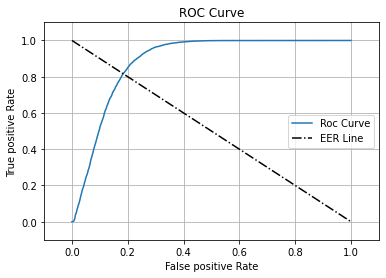

In [ ]:
#curva roc para dimension 10
U_nd2 = new_dataset @ ave[:10,:].T
Xh_nd2 = U_nd2 @ ave[:10,:]

ce_vector2 = np.array([])
for i in np.arange(new_dataset.shape[0]):
  a = new_dataset[i]
  b = Xh_nd2[i]
  ec = np.sum((a-b)**2)
  ce_vector2 = np.append(ce_vector2, ec)
plot_roc_curve(ce_vector2)

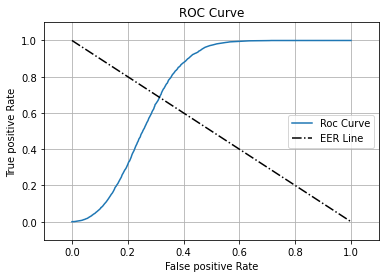

In [ ]:
#curva roc para dimension 1
U_nd3 = new_dataset @ ave[:1,:].T
Xh_nd3 = U_nd3 @ ave[:1,:]

ce_vector3 = np.array([])
for i in np.arange(new_dataset.shape[0]):
  a = new_dataset[i]
  b = Xh_nd3[i]
  ec = np.sum((a-b)**2)
  ce_vector3 = np.append(ce_vector3, ec)
plot_roc_curve(ce_vector3)

In [ ]:
#Pre processing: utilizo el pca de 80 componentes
pca3 = decomposition.PCA(n_components=80)
pca3.fit(images)
U3 = pca3.transform(images)
ave3 = pca3.components_

In [ ]:
imagenes_reconstruidas2 = U3 @ ave3
imagenes_reconstruidas2 = imagenes_reconstruidas2.reshape(largo, largo_imagen, alto_imagen)


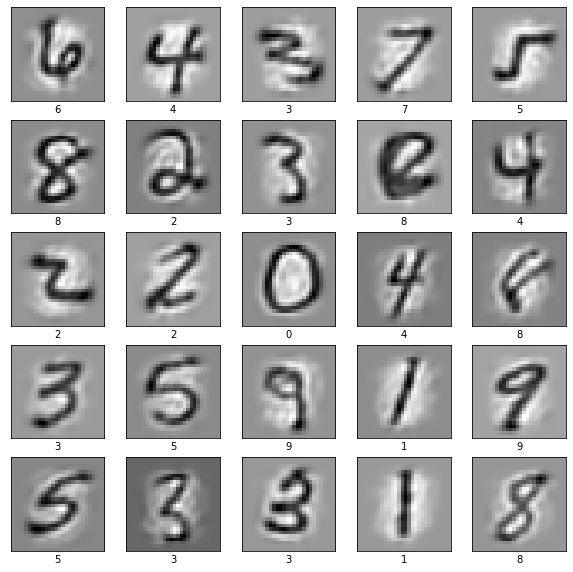

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, imagenes_reconstruidas2.shape[0])
  plt.imshow(imagenes_reconstruidas2[img_index], cmap="gray_r")
  plt.xlabel(train_labels[img_index])

In [ ]:
imagenes_reconstruidas2 = flatten_images(imagenes_reconstruidas2)

In [ ]:
#realizo clasificador con las imagenes reconstruidas

model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(10, input_dim=np.shape(imagenes_reconstruidas2)[1])) #dense(numero de clases a clasificar, dimension del input)
model.summary() 
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1, restore_best_weights=True) 
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = 'accuracy') 
hist = model.fit(x= imagenes_reconstruidas2, y= train_labels, batch_size = np.shape(imagenes_reconstruidas2)[0], epochs=2000, callbacks=[es])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
1/1 [==============================] - 1s 588ms/step - loss: 135.1926 - accuracy: 0.0823
Epoch 2/2000
1/1 [==============================] - 0s 233ms/step - loss: 55.6706 - accuracy: 0.3588
Epoch 3/2000
1/1 [==============================] - 0s 230ms/step - loss: 33.4330 - accuracy: 0.5175
Epoch 4/2000
1/1 [==============================] - 0s 278ms/step - loss: 24.9710 - accuracy: 0.5964
Epoch 5/2000
1/1 [==============================] - 0s 235ms/step - loss: 20.3607 - accuracy: 0.6452
Epoch 6/2000
1/1 [==============================] - 0s 238ms/step - loss: 

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       980
           1       0.54      0.23      0.32      1135
           2       0.51      0.50      0.51      1032
           3       0.50      0.45      0.48      1010
           4       0.37      0.33      0.35       982
           5       0.44      0.24      0.31       892
           6       0.46      0.47      0.46       958
           7       0.45      0.34      0.39      1028
           8       0.28      0.64      0.39       974
           9       0.34      0.41      0.37      1009

    accuracy                           0.42     10000
   macro avg       0.45      0.42      0.42     10000
weighted avg       0.45      0.42      0.42     10000



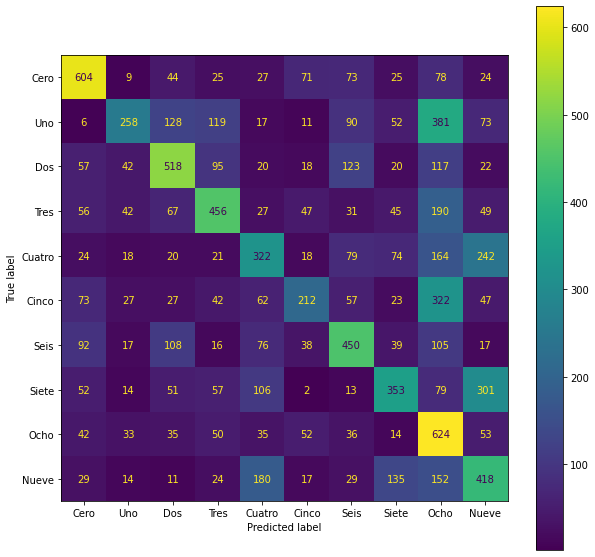

In [ ]:
#confussion matrix del modelo entrenado con datos reconstruidos
test_images_flatten = flatten_images(test_images)
valores_estimados = model.predict(test_images_flatten)

resultados_estimados = []
largo = np.shape(valores_estimados)[0]
for i in np.arange(largo):
  resultados_estimados.append(np.argmax(valores_estimados[i]))

def show_results(y_true,y_pred):

  # Plot confusion matrix
  fig, ax = plt.subplots(1,1,figsize=(10,10))
  dsp = ConfusionMatrixDisplay.from_predictions(y_true,y_pred,display_labels=["Cero", "Uno","Dos","Tres","Cuatro", "Cinco", "Seis", "Siete", "Ocho", "Nueve"],ax=ax)

  # Show Classification report
  print(classification_report(y_true,y_pred))

show_results(test_labels,resultados_estimados)

In [46]:
model2 = tf.keras.Sequential() 
model2.add(tf.keras.layers.Dense(10, input_dim=np.shape(U3)[1]))
model2.summary() 
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1, restore_best_weights=True) 
model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = 'accuracy') 
hist = model2.fit(x= U3, y= train_labels, batch_size = np.shape(U3)[0], epochs=2000, callbacks=[es])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                810       
                                                                 
Total params: 810
Trainable params: 810
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
1/1 [==============================] - 1s 814ms/step - loss: 457.4403 - accuracy: 0.0521
Epoch 2/2000
1/1 [==============================] - 0s 135ms/step - loss: 339.0948 - accuracy: 0.0880
Epoch 3/2000
1/1 [==============================] - 0s 139ms/step - loss: 249.5608 - accuracy: 0.1661
Epoch 4/2000
1/1 [==============================] - 0s 156ms/step - loss: 191.5159 - accuracy: 0.2693
Epoch 5/2000
1/1 [==============================] - 0s 105ms/step - loss: 155.2643 - accuracy: 0.3485
Epoch 6/2000
1/1 [==============================] - 0s 134ms/step - loss: 

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       980
           1       0.95      0.36      0.52      1135
           2       0.93      0.80      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.88      0.81      0.85       982
           5       0.98      0.33      0.50       892
           6       0.92      0.91      0.92       958
           7       0.96      0.83      0.89      1028
           8       0.33      0.96      0.49       974
           9       0.89      0.66      0.76      1009

    accuracy                           0.75     10000
   macro avg       0.86      0.75      0.76     10000
weighted avg       0.86      0.75      0.76     10000



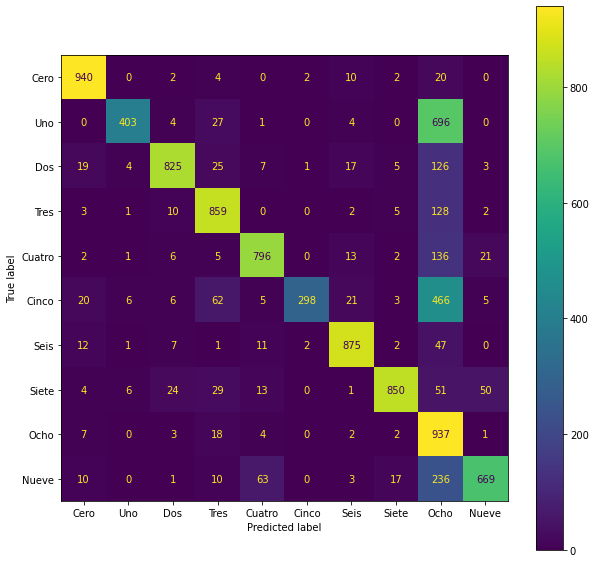

In [52]:
#confusion matrix del modelo entrenado con el espacio latente.
U3_test_images = test_images_flatten @ ave3.T

valores_estimados2 = model2.predict(U3_test_images)

resultados_estimados2 = []
largo = np.shape(valores_estimados2)[0]
for i in np.arange(largo):
  resultados_estimados2.append(np.argmax(valores_estimados2[i]))

show_results(test_labels,resultados_estimados2)